In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [2]:
df_full = pd.read_csv('data/tweets_users_dec.csv', parse_dates=['date'])
df_user = pd.read_csv('data/user_data.csv')

In [3]:
df_full['month'] = df_full['date'].dt.month
df_full['day'] = df_full['date'].dt.day

In [4]:
df_full.shape

(1484, 37)

In [5]:
df_full.head().T

,0,1,2,3,4
url_x,https://twitter.com/PodRevDay/status/133724584...,https://twitter.com/PodRevDay/status/133721570...,https://twitter.com/encounter_party/status/133...,https://twitter.com/PodRevDay/status/133718548...,https://twitter.com/PodRevDay/status/133712515...
date,2020-12-11 04:00:28+00:00,2020-12-11 02:00:42+00:00,2020-12-11 01:40:31+00:00,2020-12-11 00:00:37+00:00,2020-12-10 20:00:55+00:00
content,Want a reminder every month to help ya remembe...,"Podcast Review Day, #PodRevDay, is a reviewing...",Shoutout to the Apple Podcasts review we got o...,"woot woot woot\n\n#PodRevDay has a newsletter,...",All week I am going to be posting a hideous am...
renderedContent,Want a reminder every month to help ya remembe...,"Podcast Review Day, #PodRevDay, is a reviewing...",Shoutout to the Apple Podcasts review we got o...,"woot woot woot\n\n#PodRevDay has a newsletter,...",All week I am going to be posting a hideous am...
id_x,1337245844114960389,1337215701325664258,1337210623470563328,1337185484418785282,1337125158616768512
user,"{'username': 'PodRevDay', 'displayname': 'PodR...","{'username': 'PodRevDay', 'displayname': 'PodR...","{'username': 'encounter_party', 'displayname':...","{'username': 'PodRevDay', 'displayname': 'PodR...","{'username': 'PodRevDay', 'displayname': 'PodR..."
outlinks,['http://www.podrevday.com'],['http://www.podrevday.com'],[],['http://www.podrevday.com'],['http://www.podrevday.com']
tcooutlinks,['https://t.co/oet2vmUjAb'],['https://t.co/oet2vmUjAb'],[],['https://t.co/oet2vmUjAb'],['https://t.co/oet2vmUjAb']
replyCount,0,0,1,0,0
retweetCount,2,1,1,2,1


In [6]:
df_full.shape

(1484, 37)

In [7]:
df_full = df_full.drop_duplicates()

In [8]:
df_full.shape

(1484, 37)

In [9]:
df_full.username.value_counts()[:10]

stephfuccio       230
PodRevDay         186
musciguy           59
OracleofDusk       55
LizWilcox79        43
Podchaser          38
Infectious_Pod     25
sakeriver          17
DimensionPod       17
FitVeritas         17
Name: username, dtype: int64

In [10]:
screen = ['PodRevDay', 'stephfuccio']

df_full = df_full[~df_full.username.isin(screen)]

In [11]:
df_full.username.value_counts()[:10]

musciguy           59
OracleofDusk       55
LizWilcox79        43
Podchaser          38
Infectious_Pod     25
sakeriver          17
DimensionPod       17
FitVeritas         17
ODParlayHour       16
ToneDeafMusical    16
Name: username, dtype: int64

In [12]:
tweet_table = df_full.groupby('username').size().reset_index(name="tweets")
tweets_total = df_full.shape[0]
unique_users = df_full["username"].nunique()
sum_followers = sum(df_user.followersCount)
unique_countries = df_full.country.nunique()
median_tweet = np.median(tweet_table.tweets)
avg_retweats = np.mean(df_full.retweetCount)
avg_favorite = np.mean(df_full.likeCount)
print(f"{tweets_total}: Tweets using the hashtag #PodRevDay.")
print(f"{unique_users}: People have participted in #PodRevDay.")
print(f"{sum_followers:,d}: Followers of participants in #PodRevDay.")
print(f"{unique_countries}: Minimum number of countries with participants.")
print(f"{avg_favorite:.2f}: Averge Number of people liking a tweet about #PodRevDay")
print(f"{avg_retweats:.2f}: Average retweets per tweet about #PodRevDay")
print(f"{median_tweet:.0f}: Median number of tweets per user.")

1068: Tweets using the hashtag #PodRevDay.
350: People have participted in #PodRevDay.
583,149: Followers of participants in #PodRevDay.
17: Minimum number of countries with participants.
6.71: Averge Number of people liking a tweet about #PodRevDay
2.51: Average retweets per tweet about #PodRevDay
1: Median number of tweets per user.


In [13]:
#!mkdir plots

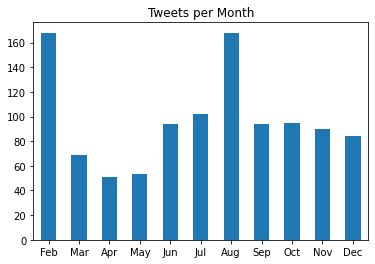

In [14]:
tweets_per_month = df_full.groupby('month').count().sort_values('month', ascending=True).reset_index()

months = ('Feb', "Mar", "Apr", 'May', "Jun", "Jul", 'Aug', "Sep", "Oct", "Nov", "Dec")
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

ax = tweets_per_month.plot.bar(x='month', 
                          y='date', 
                          title="Tweets per Month",
                          legend=None)
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");

ax.figure.savefig('plots/tweets_per_month.png');

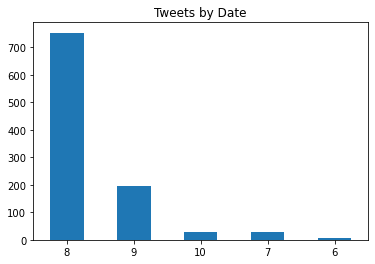

In [15]:
tweets_per_day = df_full.groupby('day').count().sort_values('month', ascending=False).reset_index()
ax2=tweets_per_day.head(5).plot.bar(x='day',
                                y='date',
                                title="Tweets by Date",
                                legend=None)
plt.xticks(rotation='horizontal')
plt.xlabel("");
ax2.figure.savefig('plots/tweets_by_date.png')

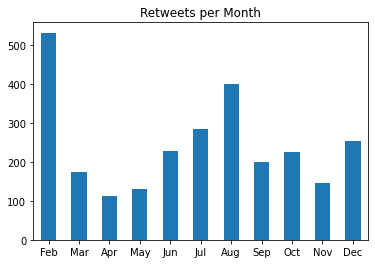

In [16]:
retweets_per_month = df_full.groupby(['month'])['retweetCount'].sum().sort_index(ascending=True)
ax3 = retweets_per_month.plot.bar(title="Retweets per Month")
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");
ax3.figure.savefig('plots/retweets_per_month.png')

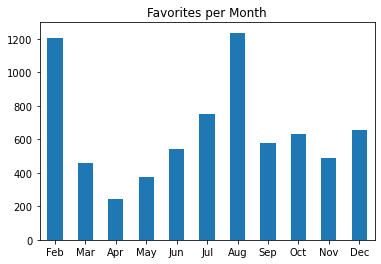

In [17]:
favorites_per_month = df_full.groupby(['month'])['likeCount'].sum().sort_index(ascending=True)
ax4 = favorites_per_month.plot.bar(title='Favorites per Month')
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");
ax4.figure.savefig('plots/favorites_per_month.png')

In [18]:
table = df_full.groupby(['month','country']).size().reset_index(name="counts")
table['total'] = table.groupby(['country'])['counts'].cumsum()
table['country'] = table.country.replace("PolandSerbia", "Poland")

In [19]:
table_wide = table.pivot(index='month',
                               columns='country',
                               values=['total']).fillna(method='ffill', axis=0)

table_wide = (table_wide.append(pd.Series(name=1))
              .sort_index())

<ipython-input-19-4598b7a0a312>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  table_wide = (table_wide.append(pd.Series(name=1))


In [20]:
table_wide.fillna(0, inplace=True)
table_wide

total                                                     \
country Australia Canada Ecuador France Germany India Italy Malaysia   
month                                                                  
1             0.0    0.0     0.0    0.0     0.0   0.0   0.0      0.0   
2             5.0    5.0     0.0    0.0     1.0   0.0   6.0      2.0   
3             5.0    5.0     1.0    0.0     1.0   0.0   6.0      2.0   
4             6.0    5.0     1.0    0.0     1.0   0.0   6.0      2.0   
5             6.0    6.0     1.0    0.0     2.0   1.0   6.0      2.0   
6             6.0    7.0     1.0    0.0     3.0   2.0   6.0      2.0   
7             6.0    9.0     1.0    1.0     5.0   2.0   6.0      2.0   
8             6.0   20.0     1.0    1.0     5.0   2.0   9.0      2.0   
9             6.0   24.0     1.0    1.0     5.0   2.0   9.0      2.0   
10            6.0   24.0     1.0    1.0     5.0   2.0   9.0      2.0   
11            6.0   31.0     1.0    1.0     5.0   2.0   9.0      2.0   
12            6.0   37.0     1.0    1.0     7.0   2.0   9.0      2.0   

                                                                             \
country New Zealand Nigeria Poland Serbia Spain Sweden United Arab Emirates   
month                                                                         
1               0.0     0.0    0.0    0.0   0.0    0.0                  0.0   
2               3.0     0.0    0.0    0.0   0.0    0.0                  0.0   
3               3.0     0.0    0.0    0.0   0.0    0.0                  0.0   
4               3.0     0.0    0.0    0.0   0.0    0.0                  0.0   
5               4.0     0.0    0.0    0.0   0.0    0.0                  0.0   
6               4.0     3.0    0.0    0.0   0.0    0.0                  0.0   
7               5.0     4.0    2.0    0.0   5.0    0.0                  0.0   
8               5.0     4.0    4.0    1.0   5.0    2.0                  3.0   
9               5.0     4.0    4.0    2.0   7.0    2.0                  3.0   
10              5.0     4.0    4.0    2.0  11.0    2.0                  3.0   
11              5.0     4.0    4.0    2.0  11.0    2.0                  3.0   
12              5.0     4.0    4.0    2.0  11.0    2.0                  3.0   

                                      
country United Kingdom United States  
month                                 
1                  0.0           0.0  
2                 13.0          73.0  
3                 20.0         112.0  
4                 24.0         137.0  
5                 34.0         163.0  
6                 48.0         209.0  
7                 59.0         248.0  
8                 62.0         337.0  
9                 71.0         383.0  
10                79.0         409.0  
11                99.0         447.0  
12               113.0         479.0

In [21]:
original_names = table_wide.columns
_ , country_names = zip(*original_names)
table_wide.columns = country_names

In [22]:
table_wide = pd.concat([table_wide]*2)
table_wide.sort_index(inplace=True)

In [23]:
mon_num = list(range(1,13))
mon_names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

months_dic = dict(zip(mon_num, mon_names))
table_wide.rename(index=months_dic, inplace=True)
table_wide

,Australia,Canada,Ecuador,France,Germany,India,Italy,Malaysia,New Zealand,Nigeria,Poland,Serbia,Spain,Sweden,United Arab Emirates,United Kingdom,United States
month,,,,,,,,,,,,,,,,,
January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
February,5.0,5.0,0.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0
February,5.0,5.0,0.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0
March,5.0,5.0,1.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,112.0
March,5.0,5.0,1.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,112.0
April,6.0,5.0,1.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,137.0
April,6.0,5.0,1.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,137.0
May,6.0,6.0,1.0,0.0,2.0,1.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,163.0


In [24]:
bcr.bar_chart_race(df=table_wide,
                   period_length=500,
                   title ="Tweets Per Country",
                   filename="plots/podrevday.gif")

/home/evan/anaconda3/envs/prd/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/evan/anaconda3/envs/prd/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [25]:
bcr.bar_chart_race(df=table_wide,
                   period_length=1250,
                   filename="plots/podrevday.mp4")

/home/evan/anaconda3/envs/prd/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/evan/anaconda3/envs/prd/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
